In [17]:
#import numpy and pandas library to read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#read and display the data

studentsInfo = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
studentsInfo

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Check if there any null value in the Dataset
studentsInfo.isnull == True


False

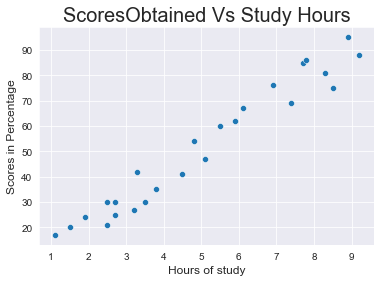

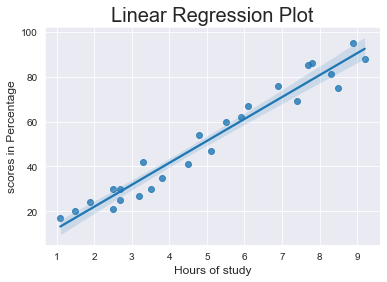

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
#visualizing data after checking for null values
sns.scatterplot(y= studentsInfo['Scores'], x= studentsInfo['Hours'])
plt.title('ScoresObtained Vs Study Hours',size=20)
plt.ylabel('Scores in Percentage', size=12)
plt.xlabel('Hours of study', size=12)
plt.show()

#plot a linear regression to show the correlation
sns.regplot(x= studentsInfo['Hours'], y= studentsInfo['Scores'])
plt.title('Linear Regression Plot',size=20)
plt.ylabel('scores in Percentage', size=12)
plt.xlabel('Hours of study', size=12)
plt.show()
print(studentsInfo.corr())

In [16]:
#train model before predicting percentage of a student based on study hours.
# split data
# Defining X and y from the studentsInfo
X = studentsInfo.iloc[:, :-1].values  
y = studentsInfo.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# fitting the studentsInfo
regression = LinearRegression()
regression.fit(train_X, train_y)

# Calculating the accuracy of the model
print('The Mean absolute error will be: ',mean_absolute_error(val_y,pred_y))


The Mean absolute error will be:  4.130879918502482


In [13]:
#since the error is low, the model is proven to be efficient

#predicting the percentage of students based on their study hours
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Percentage(scores)': [k for k in pred_y]})
prediction

,Hours,Percentage(scores)
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


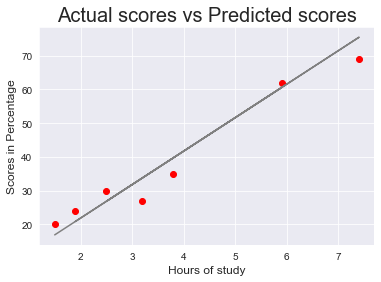

In [23]:
#compare the percentage scores , before proceeding
compare_scores = pd.DataFrame({'Actual Scores%': val_y, 'Predicted Scores%': pred_y})
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='grey')
plt.title('Actual scores vs Predicted scores', size=20)
plt.ylabel('Scores in Percentage', size=12)
plt.xlabel('Hours of study', size=12)
plt.show()



In [22]:
# finding the predicted score if a student studies for 9.25hrs/day
hours = [9.25]
answer = regression.predict([hours])
print("The Score will be = {}".format(round(answer[0],4)))

The Score will be = 93.8927
